In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'toscana'

path_data = f'{path_root}/data'
path_img_root = f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,9,Toscana,2,0,2,0,2,2,2,...,0.0,156.0,0.0,0.0,0.00,100.00,1.28,0.00,0.00,0.00
1,2020-02-26T18:00:00,9,Toscana,2,0,2,0,2,0,0,...,0.0,67.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,9,Toscana,2,0,2,0,2,0,0,...,0.0,47.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,9,Toscana,5,0,5,2,7,5,6,...,0.0,27.0,0.0,2.0,0.00,71.43,22.22,0.00,0.00,250.00
4,2020-02-29T17:00:00,9,Toscana,7,0,7,3,10,3,3,...,0.0,94.0,0.0,1.0,0.00,70.00,3.19,0.00,0.00,42.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,2021-04-11T17:00:00,9,Toscana,1668,284,1952,25806,27758,-154,1222,...,30.0,22514.0,8102.0,-132.0,14.55,7.03,5.43,15.08,-0.70,-0.55
412,2021-04-12T17:00:00,9,Toscana,1698,286,1984,25647,27631,-127,715,...,30.0,10754.0,4002.0,-159.0,14.42,7.18,6.65,17.87,0.70,-0.46
413,2021-04-13T17:00:00,9,Toscana,1664,283,1947,25467,27414,-217,934,...,34.0,23879.0,7673.0,-180.0,14.54,7.10,3.91,12.17,-1.05,-0.79
414,2021-04-14T17:00:00,9,Toscana,1664,282,1946,25131,27077,-337,1168,...,32.0,25655.0,8326.0,-336.0,14.49,7.19,4.55,14.03,-0.35,-1.23


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 4, 15, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1206
Nuovi tamponi: 25102.0
Percentuale nuovi positivi/nuovi tamponi: 4.8 %
Nuovi guariti: 1471.0
Nuovi deceduti: 26.0
Variazione positivi ricoverati con sintomi: -31.0
Variazione positivi in terapia intensiva: 4.0
Variazione positivi in isolamento dimiciliare: -264.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 4, 15, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-14T17:00:00,9,Toscana,693,130,823,11342,12165,266,725,...,17.0,16140.0,9412.0,257.0,15.80,6.77,4.49,7.70,0.78,2.24
1,2021-02-15T17:00:00,9,Toscana,713,132,845,11491,12336,171,428,...,18.0,7684.0,4455.0,149.0,15.62,6.85,5.57,9.61,1.54,1.41
2,2021-02-16T17:00:00,9,Toscana,718,133,851,11460,12311,-25,444,...,15.0,17282.0,7518.0,-31.0,15.63,6.91,2.57,5.91,0.76,-0.20
3,2021-02-17T17:00:00,9,Toscana,699,137,836,11560,12396,85,773,...,22.0,20725.0,10063.0,100.0,16.39,6.74,3.73,7.68,3.01,0.69
4,2021-02-18T17:00:00,9,Toscana,717,144,861,11942,12803,407,956,...,11.0,21027.0,11386.0,382.0,16.72,6.72,4.55,8.40,5.11,3.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-04-11T17:00:00,9,Toscana,1668,284,1952,25806,27758,-154,1222,...,30.0,22514.0,8102.0,-132.0,14.55,7.03,5.43,15.08,-0.70,-0.55
57,2021-04-12T17:00:00,9,Toscana,1698,286,1984,25647,27631,-127,715,...,30.0,10754.0,4002.0,-159.0,14.42,7.18,6.65,17.87,0.70,-0.46
58,2021-04-13T17:00:00,9,Toscana,1664,283,1947,25467,27414,-217,934,...,34.0,23879.0,7673.0,-180.0,14.54,7.10,3.91,12.17,-1.05,-0.79
59,2021-04-14T17:00:00,9,Toscana,1664,282,1946,25131,27077,-337,1168,...,32.0,25655.0,8326.0,-336.0,14.49,7.19,4.55,14.03,-0.35,-1.23


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

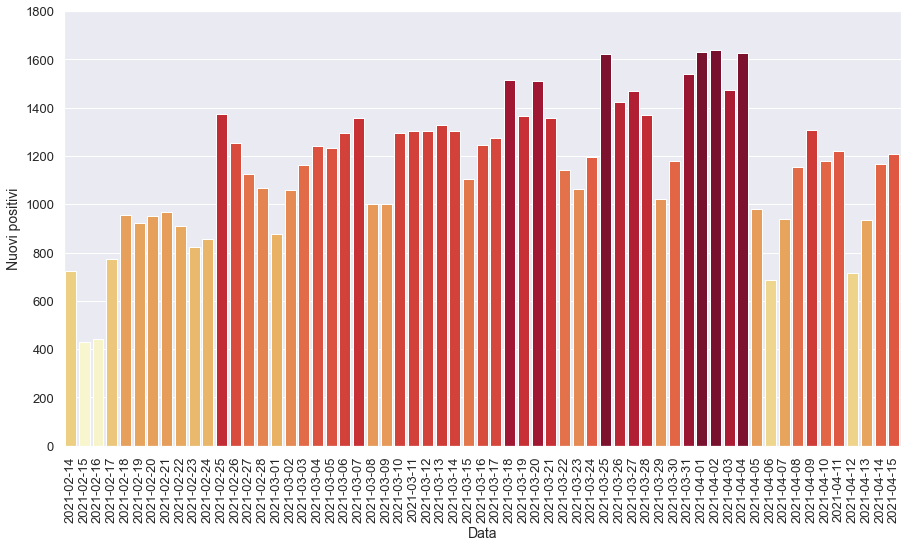

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

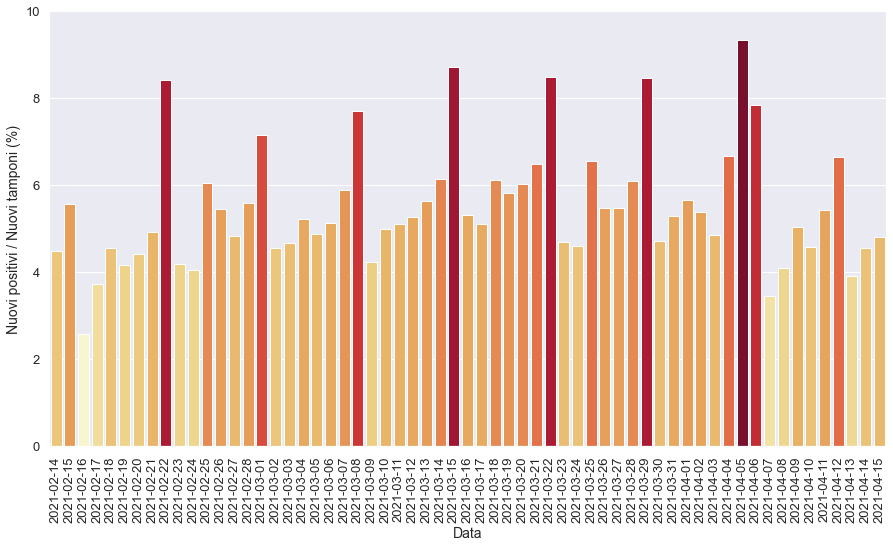

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

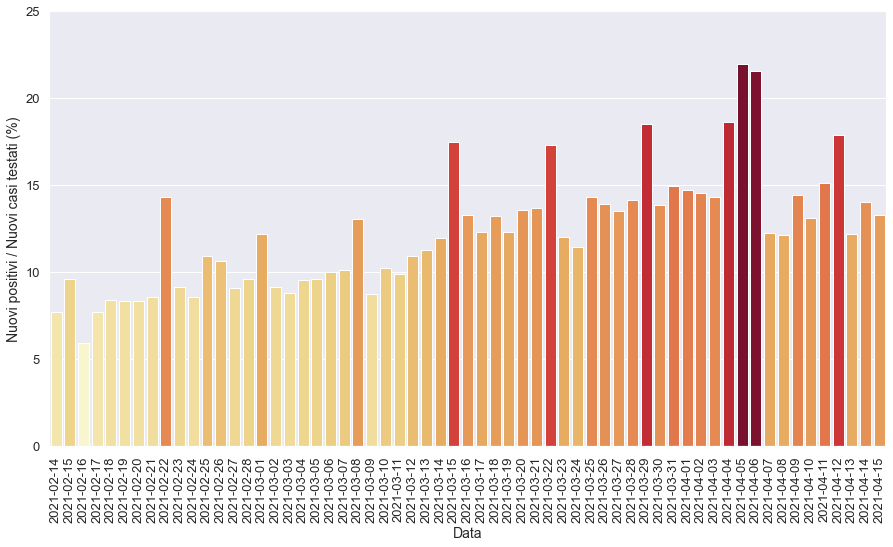

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

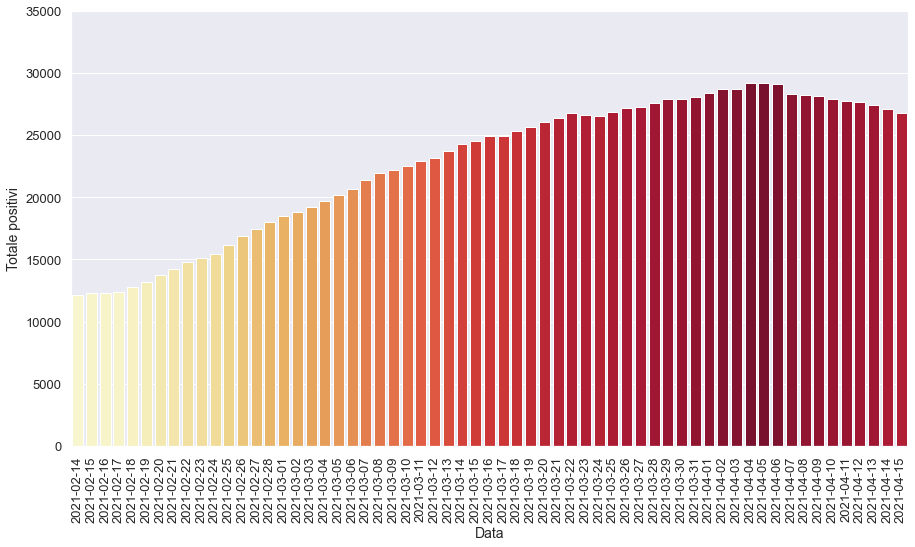

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

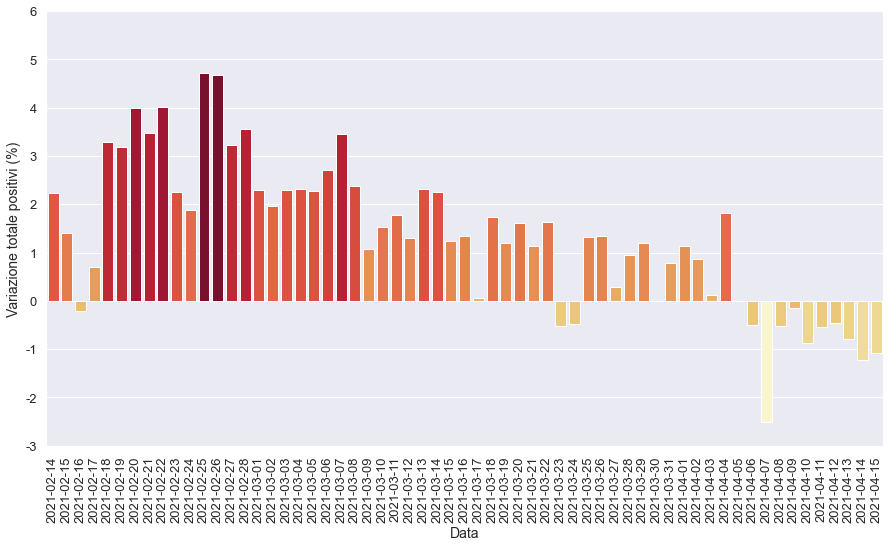

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

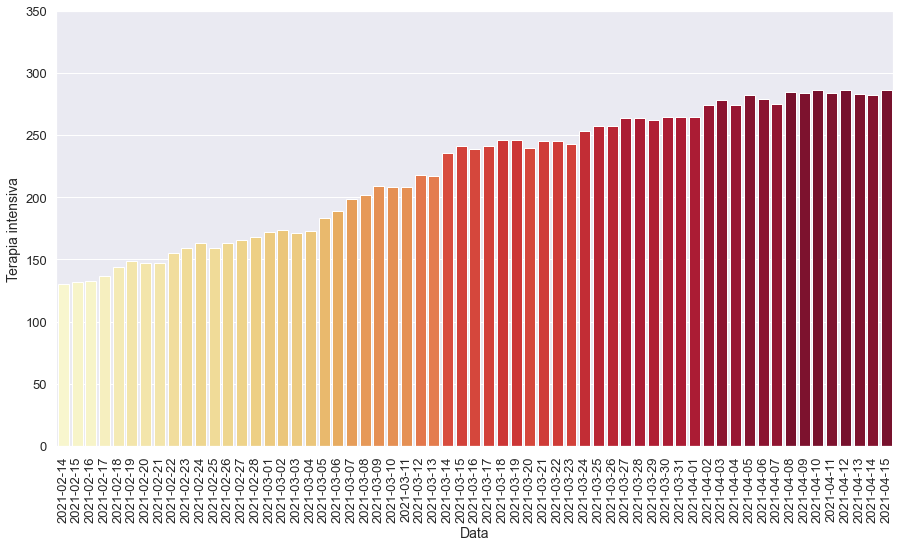

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

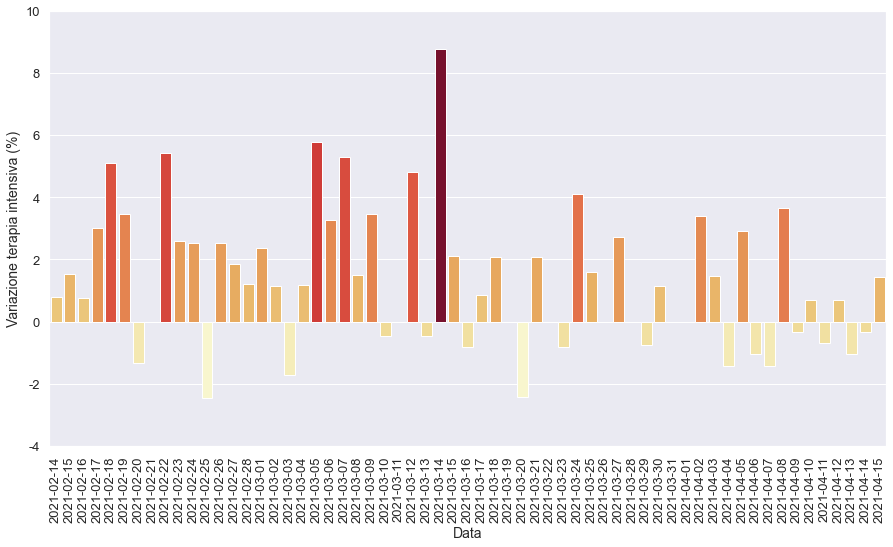

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

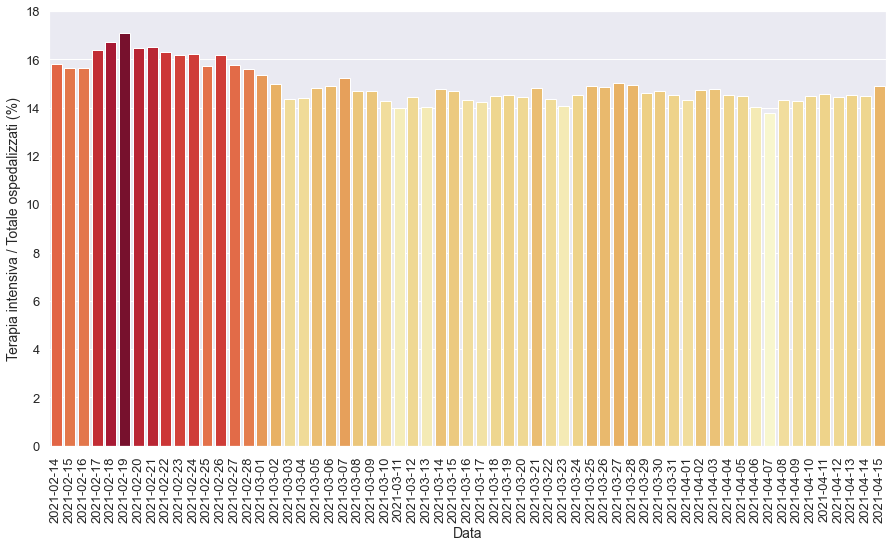

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

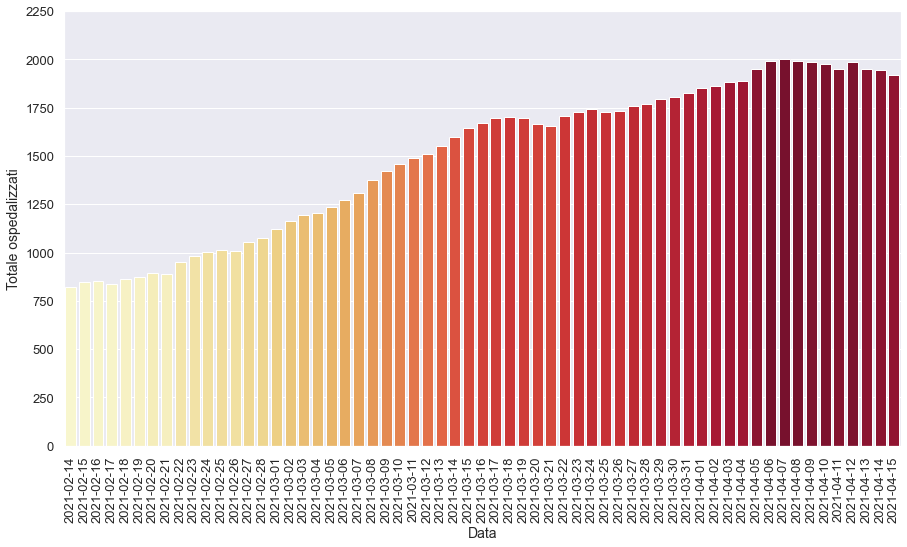

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

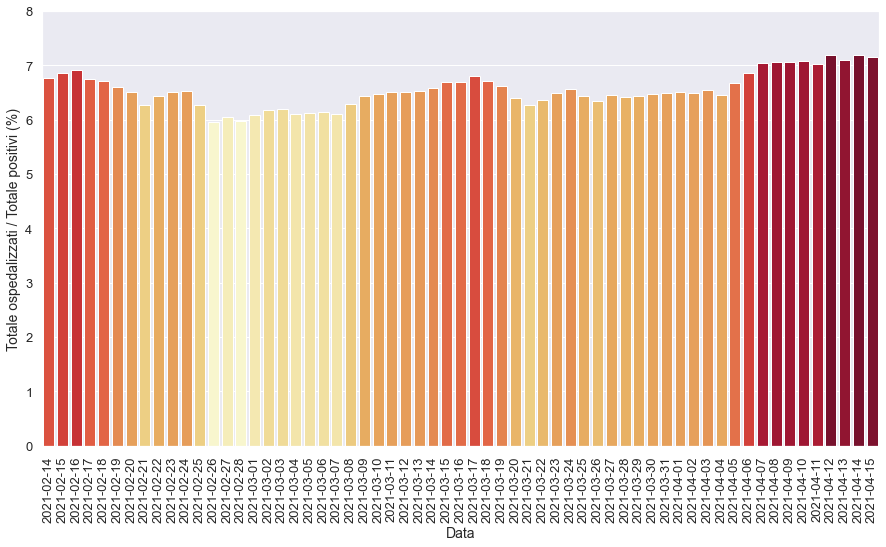

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

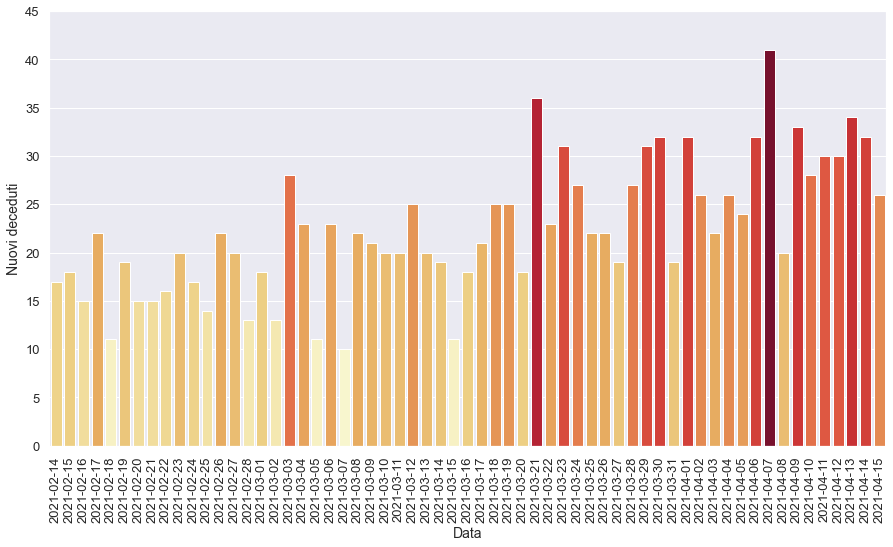

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

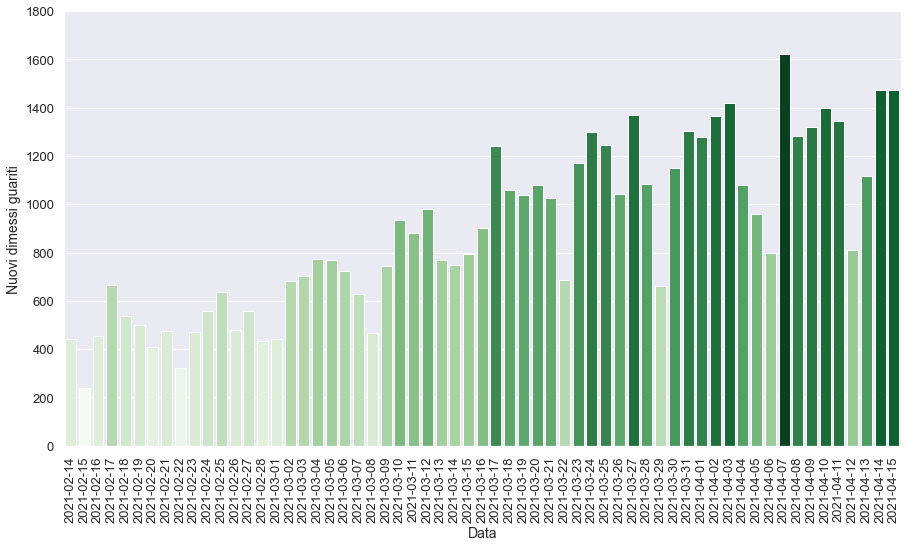

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-03-16T17:00:00,9,Toscana,1430,239,1669,23226,24895,329,1247,...,18.0,23470.0,9383.0,303.0,14.32,6.70,5.31,13.29,-0.83,1.34
1,2021-03-17T17:00:00,9,Toscana,1453,241,1694,23213,24907,12,1275,...,21.0,24938.0,10379.0,-13.0,14.23,6.80,5.11,12.28,0.84,0.05
2,2021-03-18T17:00:00,9,Toscana,1454,246,1700,23638,25338,431,1513,...,25.0,24764.0,11462.0,425.0,14.47,6.71,6.11,13.20,2.07,1.73
3,2021-03-19T17:00:00,9,Toscana,1448,246,1694,23945,25639,301,1365,...,25.0,23465.0,11115.0,307.0,14.52,6.61,5.82,12.28,0.00,1.19
4,2021-03-20T17:00:00,9,Toscana,1424,240,1664,24387,26051,412,1510,...,18.0,25044.0,11117.0,442.0,14.42,6.39,6.03,13.58,-2.44,1.61
5,2021-03-21T17:00:00,9,Toscana,1408,245,1653,24695,26348,297,1358,...,36.0,20929.0,9929.0,308.0,14.82,6.27,6.49,13.68,2.08,1.14
6,2021-03-22T17:00:00,9,Toscana,1461,245,1706,25073,26779,431,1140,...,23.0,13459.0,6582.0,378.0,14.36,6.37,8.47,17.32,0.00,1.64
7,2021-03-23T17:00:00,9,Toscana,1486,243,1729,24909,26638,-141,1062,...,31.0,22677.0,8839.0,-164.0,14.05,6.49,4.68,12.01,-0.82,-0.53
8,2021-03-24T17:00:00,9,Toscana,1488,253,1741,24770,26511,-127,1197,...,27.0,26059.0,10451.0,-139.0,14.53,6.57,4.59,11.45,4.12,-0.48
9,2021-03-25T17:00:00,9,Toscana,1470,257,1727,25137,26864,353,1620,...,22.0,24739.0,11346.0,367.0,14.88,6.43,6.55,14.28,1.58,1.33


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

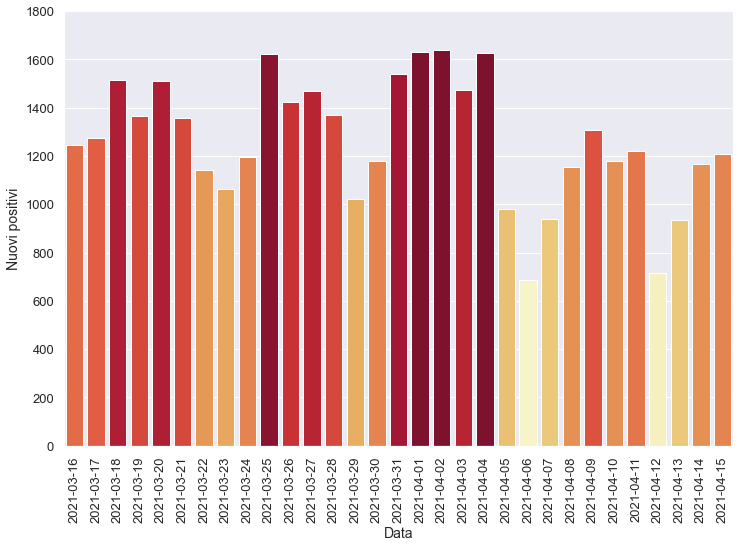

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

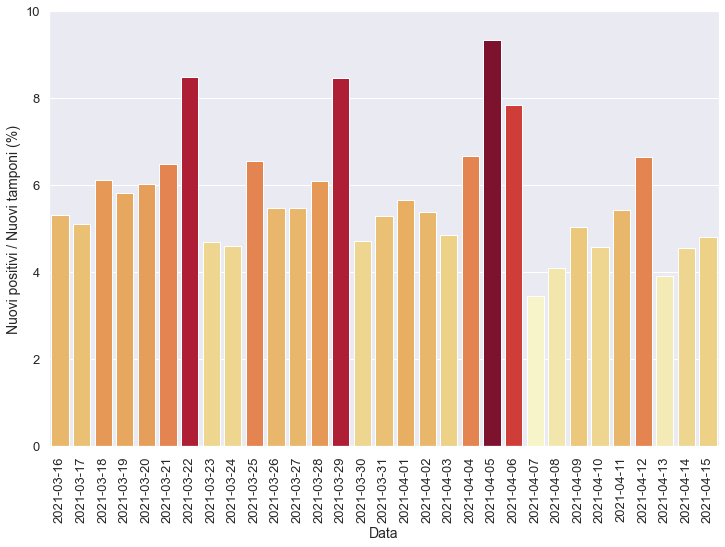

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

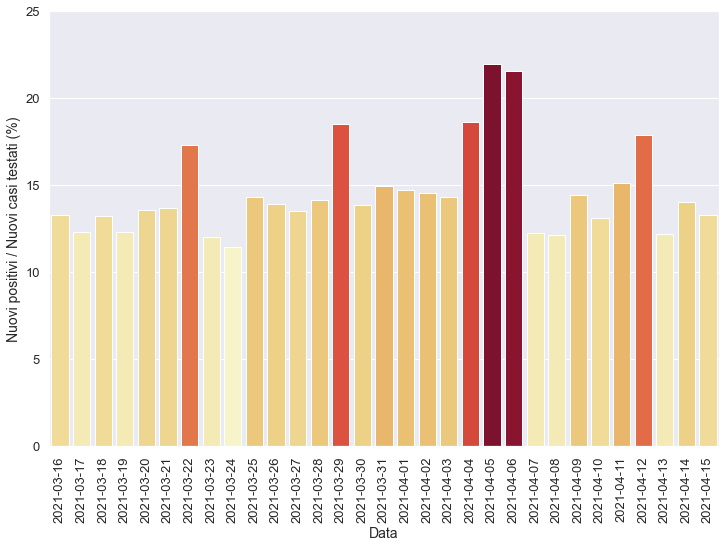

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

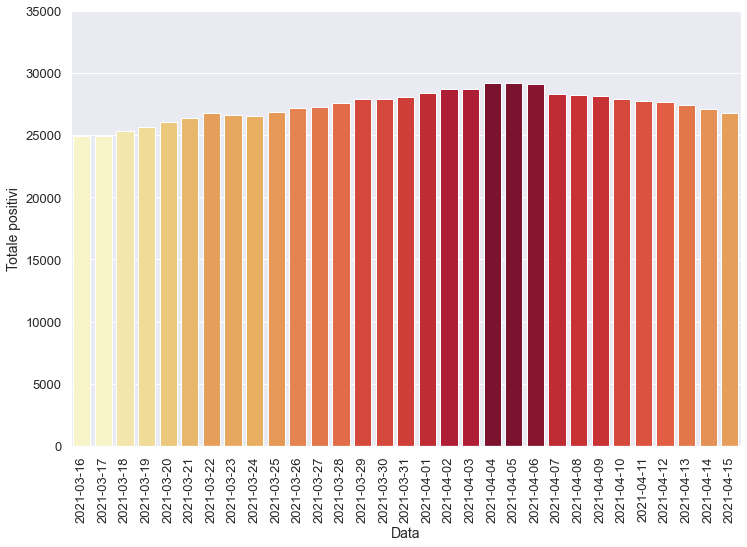

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

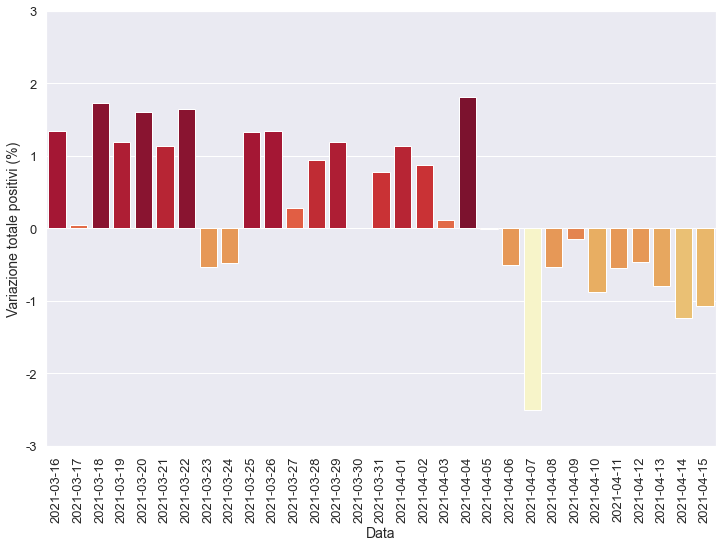

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

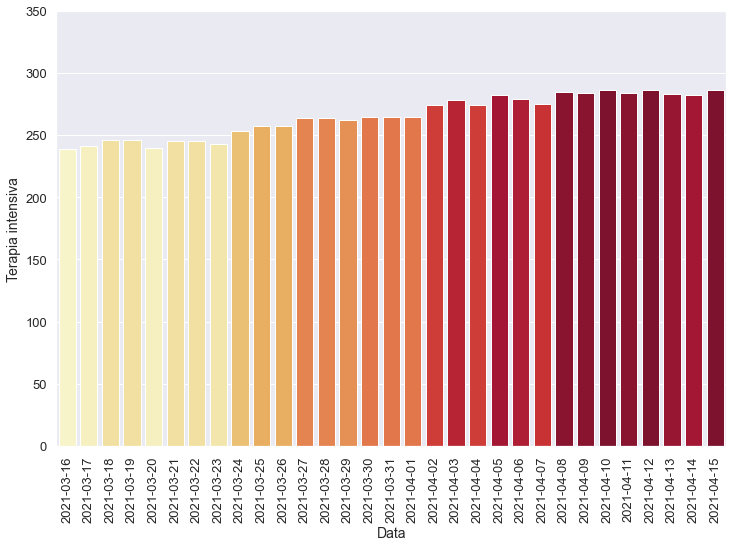

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

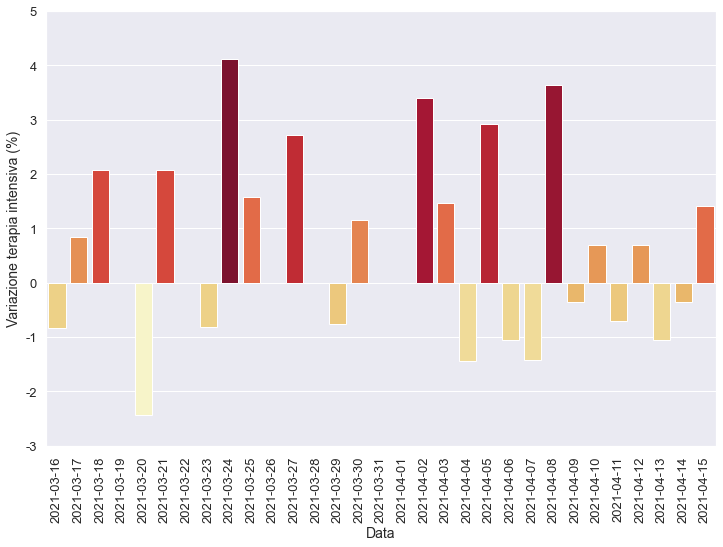

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

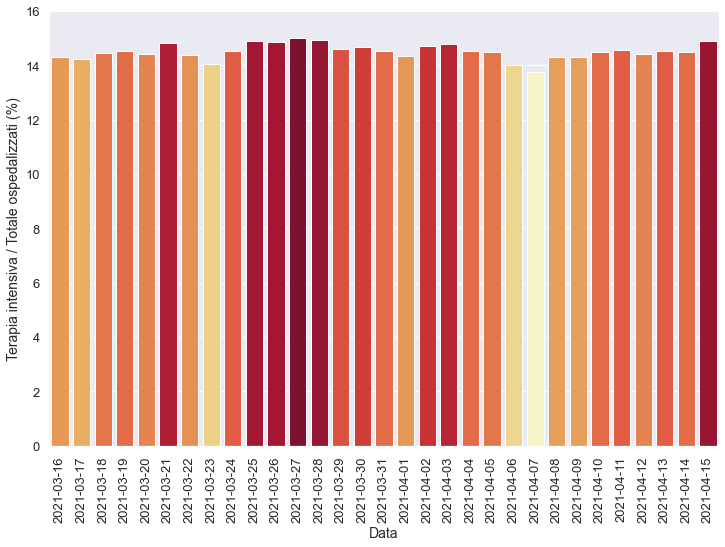

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

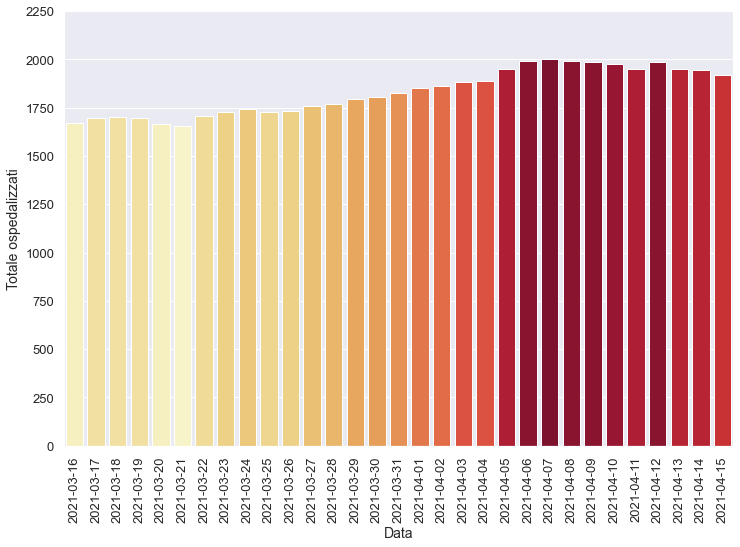

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

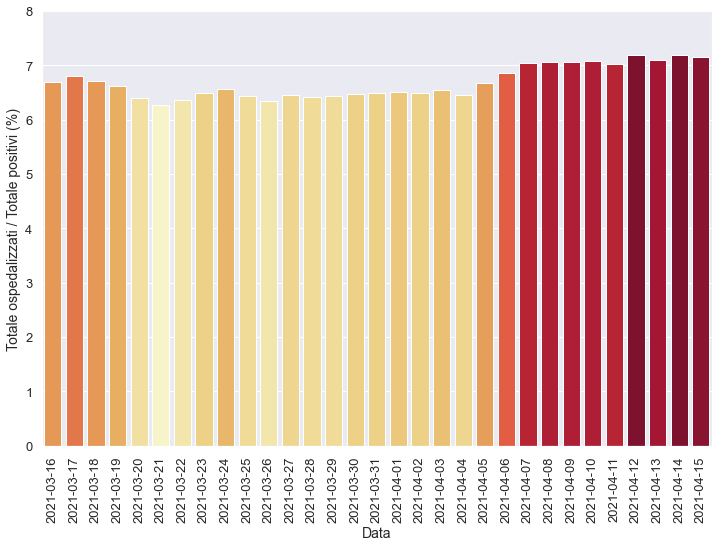

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

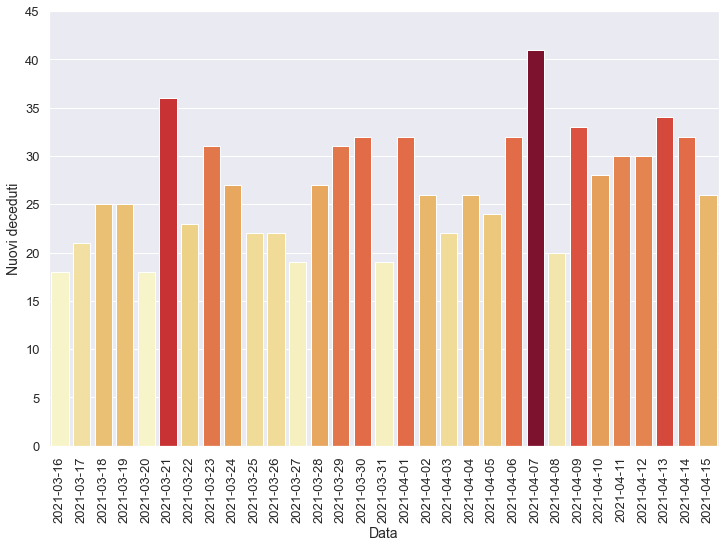

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

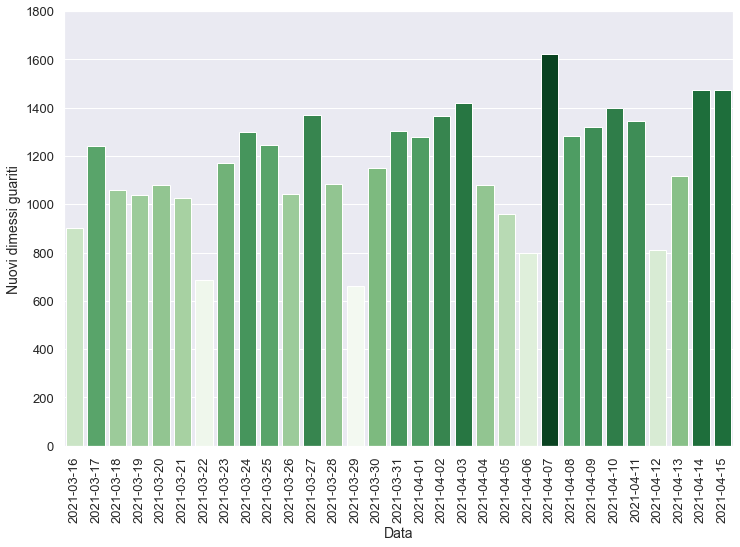

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-04-08T17:00:00,9,Toscana,1707,285,1992,26211,28203,-149,1153,...,20.0,28229.0,9495.0,-142.0,14.31,7.06,4.08,12.14,3.64,-0.53
1,2021-04-09T17:00:00,9,Toscana,1704,284,1988,26172,28160,-43,1309,...,33.0,26094.0,9095.0,-39.0,14.29,7.06,5.02,14.39,-0.35,-0.15
2,2021-04-10T17:00:00,9,Toscana,1688,286,1974,25938,27912,-248,1177,...,28.0,25690.0,8968.0,-234.0,14.49,7.07,4.58,13.12,0.70,-0.88
3,2021-04-11T17:00:00,9,Toscana,1668,284,1952,25806,27758,-154,1222,...,30.0,22514.0,8102.0,-132.0,14.55,7.03,5.43,15.08,-0.70,-0.55
4,2021-04-12T17:00:00,9,Toscana,1698,286,1984,25647,27631,-127,715,...,30.0,10754.0,4002.0,-159.0,14.42,7.18,6.65,17.87,0.70,-0.46
5,2021-04-13T17:00:00,9,Toscana,1664,283,1947,25467,27414,-217,934,...,34.0,23879.0,7673.0,-180.0,14.54,7.10,3.91,12.17,-1.05,-0.79
6,2021-04-14T17:00:00,9,Toscana,1664,282,1946,25131,27077,-337,1168,...,32.0,25655.0,8326.0,-336.0,14.49,7.19,4.55,14.03,-0.35,-1.23
7,2021-04-15T17:00:00,9,Toscana,1633,286,1919,24867,26786,-291,1206,...,26.0,25102.0,9110.0,-264.0,14.90,7.16,4.80,13.24,1.42,-1.07


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

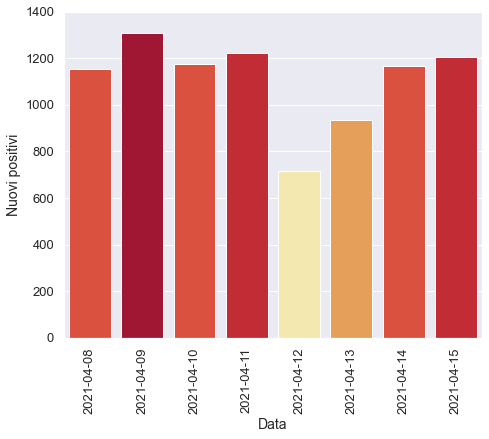

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

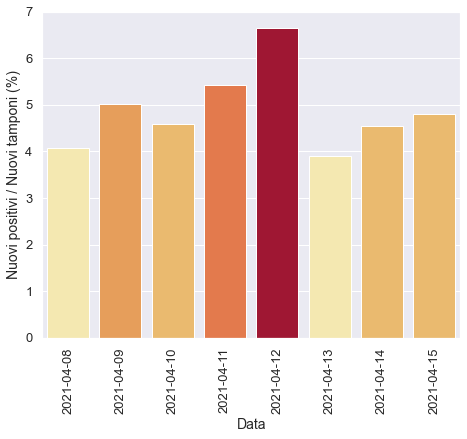

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

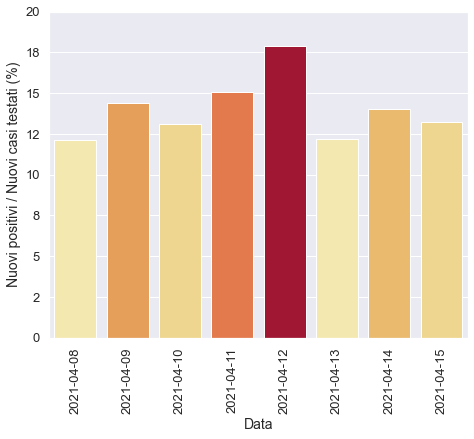

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

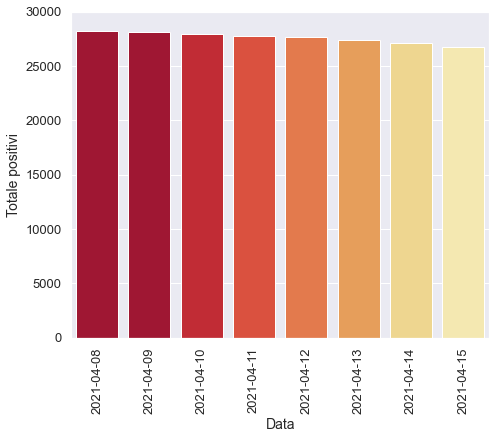

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

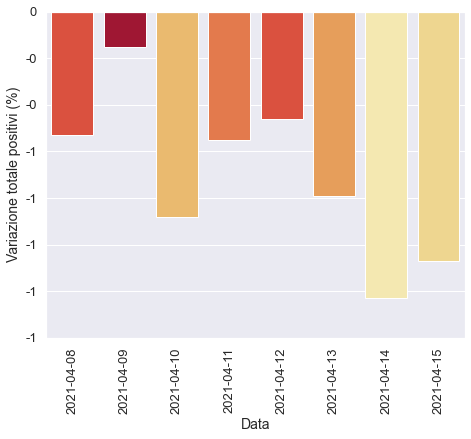

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

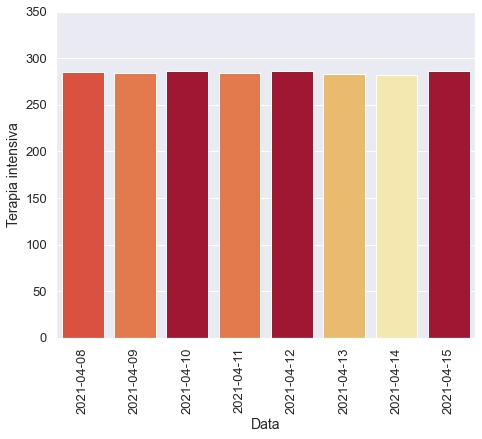

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

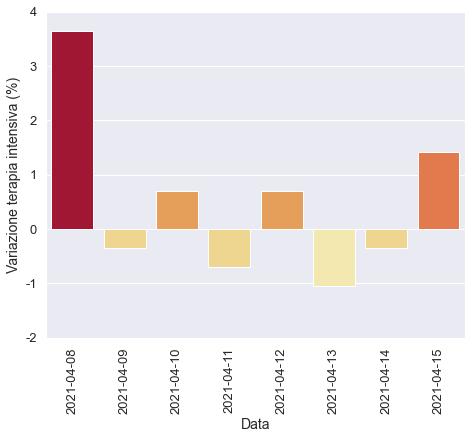

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

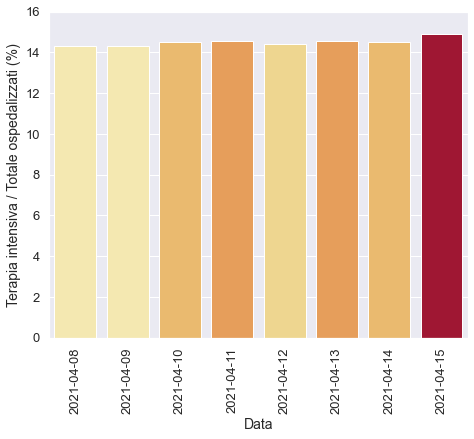

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

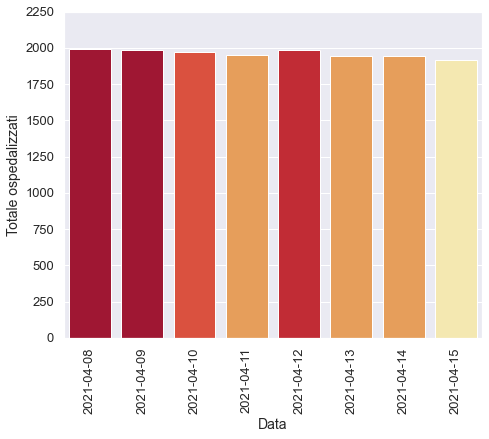

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

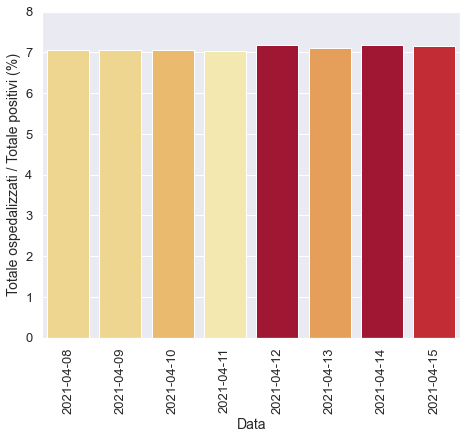

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

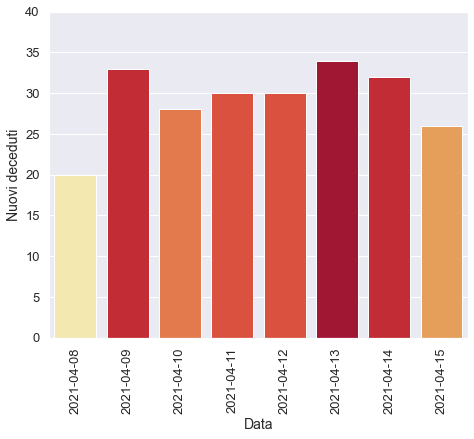

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

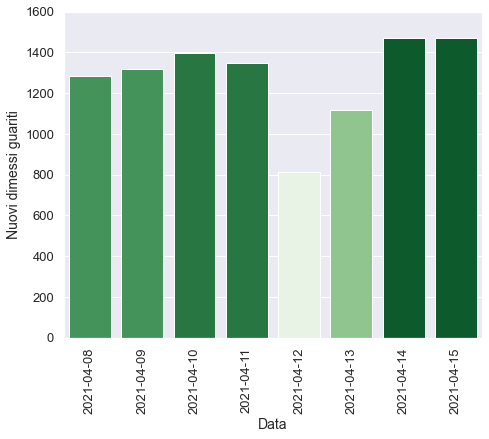

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)